In [8]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
import random

import itertools

from matplotlib import pyplot as plt
import seaborn as sns

import io
from scipy import misc

import time

%matplotlib inline

In [35]:
def importData(fileName):
    finalData = pd.read_csv(fileName)
    finalData.count()

    from sklearn import preprocessing
    

    for column in finalData.columns:
        if finalData[column].dtype == type(object):
            le = preprocessing.LabelEncoder()
            finalData[column] = le.fit_transform(finalData[column])
            
    return finalData.sample(frac = 1)

In [10]:
def setupData(finalData, fraction):
    data, test = train_test_split(finalData, test_size = 0.2)
    data = data.sample(frac = fraction)
    features = ['Parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']

    X_data = data[features]
    y_data = data['app_status']

    X_test = test[features]
    y_test = test["app_status"]
    return (X_data, y_data, X_test, y_test)

In [11]:
def makePlots(data, fileName):
    print(data)
    numbers, scores, trainTimes, testTimes, trainAcc = [i[0] for i in data], [i[1] for i in data], [i[2] for i in data], [i[3] for i in data], [i[4] for i in data]
    
    plotData = [('numbers', numbers), ('scores', scores), ('train times', trainTimes), ('testTimes', testTimes), ('train accuracy', trainAcc)]
    
    df = pd.DataFrame.from_items(plotData)
    df.to_csv(fileName)
    
    
    #leanring curve
    plt.plot(numbers, scores, 'bo')
    plt.title("Learning Curve")
    plt.xlabel("Number of Examples")
    plt.ylabel("% Accuracy")
    plt.show()
    #train curve time
    plt.plot(numbers, trainTimes, 'ro')
    plt.title("Train Timing Curve")
    plt.xlabel("Number of Examples")
    plt.ylabel("Time (Seconds)")
    plt.show()
    #test curve time
    plt.plot(numbers, testTimes, 'ro')
    plt.title("Test Timing Curve")
    plt.xlabel("Number of Examples")
    plt.ylabel("Time (Seconds)")
    plt.show()
    

In [12]:
def storeHyperParameters(accuracies, fileName):
    df = pd.DataFrame(list(accuracies.items()), columns = ['Hyper Parameter', 'Accuracy'])
    df.to_csv(fileName)
    

# Decision Trees

In [13]:
def trainandTestDecisionTree(data, bestSplit):
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    
    X_data, y_data, X_test, y_test = data
    
    if bestSplit is None:
        n = 5
        kf = KFold(n_splits = n)
        kf.get_n_splits(X_data)
        hyperParameters = [x*2 for x in range(1, 100)]
        accuracies = {}

        for hyperParameter in hyperParameters:
            averageAccuracy = 0
            for train_index, validate_index in kf.split(X_data):
                c = DecisionTreeClassifier(min_samples_split = hyperParameter)
                X_train, X_validate = X_data.iloc[train_index], X_data.iloc[validate_index]
                y_train, y_validate = y_data.iloc[train_index], y_data.iloc[validate_index]
                dt = c.fit(X_train, y_train)
                y_pred = c.predict(X_validate)
                score = accuracy_score(y_validate, y_pred) *100
                averageAccuracy += score
            averageAccuracy = averageAccuracy/n
            print("for the hyperParameter %d, the accuracy is %f" % (hyperParameter, averageAccuracy))
            accuracies[hyperParameter] = averageAccuracy

        print("finished \n")
        bestSplit = max(accuracies, key=accuracies.get)
        storeHyperParameters(accuracies, 'decisionTreeHyperParameters.csv');
        
        print("best hyper parameter: %d" % (max(accuracies, key=accuracies.get)))

    print("Training Final Decision Tree Learner")
    c = DecisionTreeClassifier(min_samples_split = bestSplit)
    
    start = time.time()
    dt = c.fit(X_data, y_data)
    end = time.time()
    trainTime = end - start
    
    start = time.time()
    y_pred = c.predict(X_test)
    end = time.time()
    testTime = end - start
    
    score = accuracy_score(y_test, y_pred) *100
    print("The Score is %f" % (score))
    
    
    y_train_pred = c.predict(X_data)
    trainAcc = accuracy_score(y_data, y_train_pred) *100
    
    return (score, trainTime, testTime, bestSplit, trainAcc)

current iteration fraction: 1.000000
for the hyperParameter 2, the accuracy is 79.000000
for the hyperParameter 4, the accuracy is 79.000000
for the hyperParameter 6, the accuracy is 76.000000
for the hyperParameter 8, the accuracy is 79.000000
for the hyperParameter 10, the accuracy is 78.000000
for the hyperParameter 12, the accuracy is 78.000000
for the hyperParameter 14, the accuracy is 79.000000
for the hyperParameter 16, the accuracy is 79.000000
for the hyperParameter 18, the accuracy is 79.000000
for the hyperParameter 20, the accuracy is 78.000000
for the hyperParameter 22, the accuracy is 78.000000
for the hyperParameter 24, the accuracy is 75.000000
for the hyperParameter 26, the accuracy is 74.000000
for the hyperParameter 28, the accuracy is 74.000000
for the hyperParameter 30, the accuracy is 69.000000
for the hyperParameter 32, the accuracy is 69.000000
for the hyperParameter 34, the accuracy is 69.000000
for the hyperParameter 36, the accuracy is 69.000000
for the hyper

Training Final Decision Tree Learner
The Score is 65.384615
current iteration fraction: 0.606667
Training Final Decision Tree Learner
The Score is 84.615385
current iteration fraction: 0.600000
Training Final Decision Tree Learner
The Score is 80.769231
current iteration fraction: 0.593333
Training Final Decision Tree Learner
The Score is 88.461538
current iteration fraction: 0.586667
Training Final Decision Tree Learner
The Score is 80.769231
current iteration fraction: 0.580000
Training Final Decision Tree Learner
The Score is 88.461538
current iteration fraction: 0.573333
Training Final Decision Tree Learner
The Score is 88.461538
current iteration fraction: 0.566667
Training Final Decision Tree Learner
The Score is 88.461538
current iteration fraction: 0.560000
Training Final Decision Tree Learner
The Score is 92.307692
current iteration fraction: 0.553333
Training Final Decision Tree Learner
The Score is 92.307692
current iteration fraction: 0.546667
Training Final Decision Tree L

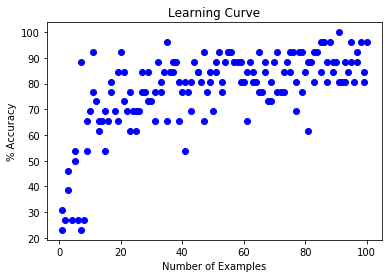

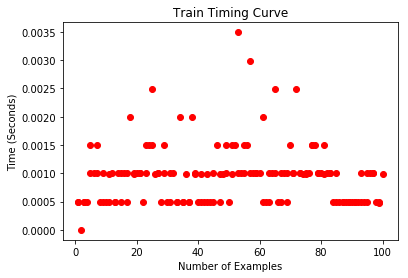

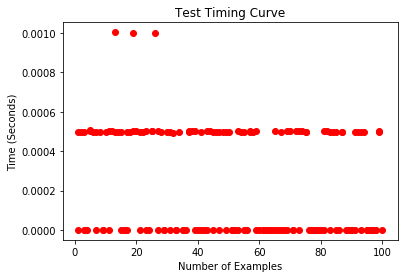

In [14]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/150.0) for i in range(1, 151)]
fractions = list(reversed(fractions))

outputData = []

bestHyperParameter = None;

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupData(finalData, i)
    testValues = trainandTestDecisionTree(data, bestHyperParameter)
    bestHyperParameter = testValues[3]
    X_data = data[0]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'decisionTreeOutput.csv')
    

# K Nearest Neighbors

In [38]:
def trainandTestKNN(data, besthyperParameter):
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    
    X_data, y_data, X_test, y_test = data
    
    n = 5
    kf = KFold(n_splits = n)
    kf.get_n_splits(X_data)
    hyperParameterK = [x for x in range(1, 50)]
    hyperParameterP = range(1, 5)
    hyperParameters = list(itertools.product(hyperParameterK, hyperParameterP))
    hyperParameters = random.sample(hyperParameters, 50)
    accuracies = {}

    if besthyperParameter is None:
        for hyperParameter in hyperParameters:
            averageAccuracy = 0
            for train_index, validate_index in kf.split(X_data):
                c = KNeighborsClassifier(n_neighbors = hyperParameter[0], p = hyperParameter[1])
                X_train, X_validate = X_data.iloc[train_index], X_data.iloc[validate_index]
                y_train, y_validate = y_data.iloc[train_index], y_data.iloc[validate_index]
                dt = c.fit(X_train, y_train)
                y_pred = c.predict(X_validate)
                score = accuracy_score(y_validate, y_pred) *100
                averageAccuracy += score
            averageAccuracy = averageAccuracy/n
            print("for the hyperParameter %d, %d, the accuracy is %f" % (hyperParameter[0], hyperParameter[1], averageAccuracy))
            accuracies[hyperParameter] = averageAccuracy
            storeHyperParameters(accuracies, 'KNNHyperParameters.csv')

        print("finished \n")
        besthyperParameter = max(accuracies, key=accuracies.get)
        print("best hyper parameter: %d, %d" % (besthyperParameter[0], besthyperParameter[1]))

    print("Training Final KNN Learner")
    c = KNeighborsClassifier(n_neighbors = besthyperParameter[0], p = besthyperParameter[1])
    
    start = time.time()
    dt = c.fit(X_data, y_data)
    end = time.time()
    trainTime = end - start
    
    start = time.time()
    y_pred = c.predict(X_test)
    end = time.time()
    testTime = end - start
    
    score = accuracy_score(y_test, y_pred) *100
    print("The Score is %f" % (score))
    
    y_train_pred = c.predict(X_data)
    trainAcc = accuracy_score(y_data, y_train_pred) *100
    
    return (score, trainTime, testTime, besthyperParameter, trainAcc)

current iteration fraction: 1.000000
for the hyperParameter 13, 2, the accuracy is 94.952450
for the hyperParameter 6, 2, the accuracy is 96.159915
for the hyperParameter 23, 3, the accuracy is 94.695151
for the hyperParameter 10, 4, the accuracy is 95.704582
for the hyperParameter 20, 2, the accuracy is 95.031663
for the hyperParameter 13, 1, the accuracy is 95.397823
for the hyperParameter 22, 2, the accuracy is 95.160326
for the hyperParameter 29, 4, the accuracy is 94.813929
for the hyperParameter 10, 2, the accuracy is 95.615522
for the hyperParameter 7, 3, the accuracy is 96.199514
for the hyperParameter 10, 1, the accuracy is 95.744211
for the hyperParameter 28, 4, the accuracy is 95.100940
finished 

best hyper parameter: 7, 3
Training Final KNN Learner
The Score is 96.951702
current iteration fraction: 0.980000
Training Final KNN Learner
The Score is 96.991291
current iteration fraction: 0.960000
Training Final KNN Learner
The Score is 96.872526
current iteration fraction: 0.9

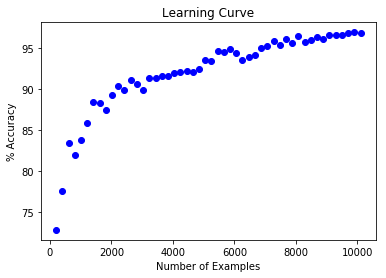

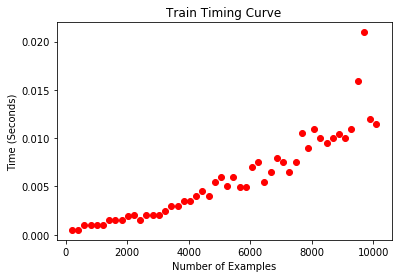

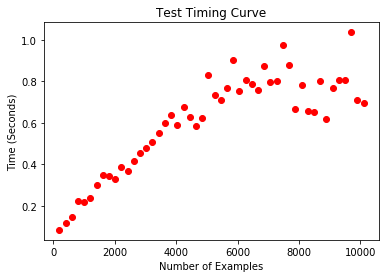

In [39]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/50) for i in range(1, 51)]
fractions = list(reversed(fractions))

besthyperParameter = None

outputData = []

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupData(finalData, i)
    testValues = trainandTestKNN(data, besthyperParameter)
    X_data = data[0]
    besthyperParameter = testValues[3]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'KNNOutput.csv')

# Boosting

In [18]:
def trainandTestBoosting(data, besthyperParameter):
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    
    X_data, y_data, X_test, y_test = data
    
    n = 5
    kf = KFold(n_splits = n)
    kf.get_n_splits(X_data)
    hyperParameterEstimators = [x*2 for x in range(1, 50)]
    hyperParameterLearningRate = [i * .05 for i in range(1, 100)]
    hyperParameters = list(itertools.product(hyperParameterEstimators, hyperParameterLearningRate))
    hyperParameters = random.sample(hyperParameters, 50)
    accuracies = {}

    if besthyperParameter is None:
        for hyperParameter in hyperParameters:
            averageAccuracy = 0
            for train_index, validate_index in kf.split(X_data):
                c = AdaBoostClassifier(n_estimators = hyperParameter[0], learning_rate = hyperParameter[1])
                X_train, X_validate = X_data.iloc[train_index], X_data.iloc[validate_index]
                y_train, y_validate = y_data.iloc[train_index], y_data.iloc[validate_index]
                dt = c.fit(X_train, y_train)
                y_pred = c.predict(X_validate)
                score = accuracy_score(y_validate, y_pred) *100
                averageAccuracy += score
            averageAccuracy = averageAccuracy/n
            print("for the hyperParameter %d, %d, the accuracy is %f" % (hyperParameter[0], hyperParameter[1], averageAccuracy))
            accuracies[hyperParameter] = averageAccuracy
            storeHyperParameters(accuracies, 'BoostingHyperParameters.csv')

        print("finished \n")
        besthyperParameter = max(accuracies, key=accuracies.get)
        print("best hyper parameter: %f, %f" % (besthyperParameter[0], besthyperParameter[1]))

    print("Training Final Boosting Learner")
    c = AdaBoostClassifier(n_estimators = besthyperParameter[0], learning_rate = besthyperParameter[1])
    
    start = time.time()
    dt = c.fit(X_data, y_data)
    end = time.time()
    trainTime = end - start
    
    start = time.time()
    y_pred = c.predict(X_test)
    end = time.time()
    testTime = end - start
    
    score = accuracy_score(y_test, y_pred) *100
    print("The Score is %f" % (score))
    
    y_train_pred = c.predict(X_data)
    trainAcc = accuracy_score(y_data, y_train_pred) *100
    
    return (score, trainTime, testTime, besthyperParameter, trainAcc)

current iteration fraction: 0.950000
for the hyperParameter 72, 3, the accuracy is 65.263158
for the hyperParameter 92, 0, the accuracy is 81.052632
for the hyperParameter 94, 0, the accuracy is 82.105263
for the hyperParameter 94, 4, the accuracy is 76.842105
for the hyperParameter 56, 1, the accuracy is 81.052632
for the hyperParameter 82, 4, the accuracy is 56.842105
for the hyperParameter 72, 0, the accuracy is 81.052632
for the hyperParameter 44, 4, the accuracy is 71.578947
for the hyperParameter 6, 4, the accuracy is 76.842105
for the hyperParameter 36, 0, the accuracy is 80.000000
for the hyperParameter 42, 1, the accuracy is 83.157895
for the hyperParameter 16, 3, the accuracy is 76.842105
for the hyperParameter 90, 0, the accuracy is 84.210526
for the hyperParameter 6, 1, the accuracy is 81.052632
for the hyperParameter 36, 4, the accuracy is 63.157895
for the hyperParameter 52, 3, the accuracy is 72.631579
for the hyperParameter 76, 0, the accuracy is 83.157895
for the hyper

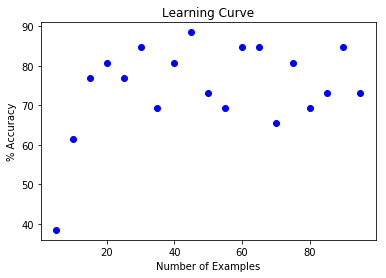

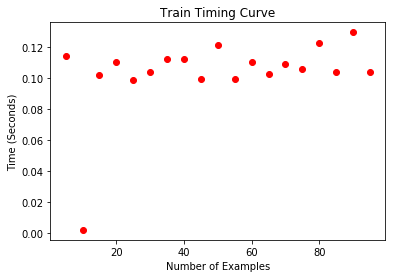

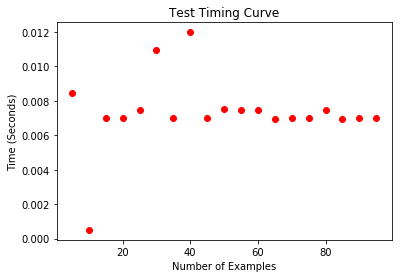

In [19]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/20) for i in range(1, 20)]
fractions = list(reversed(fractions))

besthyperParameter = None

outputData = []

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupData(finalData, i)
    testValues = trainandTestBoosting(data, besthyperParameter)
    X_data = data[0]
    besthyperParameter = testValues[3]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'boostingOutput.csv')

# SVM

In [23]:
def setupDataSVM(finalData, fraction):
    
    data, test = train_test_split(finalData, test_size = 0.2)
    data = data.sample(frac = fraction)
    
    train, validate = train_test_split(data, test_size = 0.2)
    
    
    features = ['Parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']

    X_train = train[features]
    y_train = train['app_status']
    
    X_validate = validate[features]
    y_validate = validate['app_status']

    X_test = test[features]
    y_test = test["app_status"]
    return (X_train, y_train, X_validate, y_validate, X_test, y_test)

In [24]:
def trainandTestSVM(data, kernel, besthyperParameter, csvName):
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    
    X_train, y_train, X_validate, y_validate, X_test, y_test = data
    

    hyperParameters = []
    
    hyperParameterDegree = range(1,11)
    hyperParameterGamma = [i * 0.1 for i in range(1,10)]
    hyperParameterTol = [i * 0.0004 for i in range (1, 10)]
    
    if kernel is 'poly':
        hyperParameters = list(itertools.product(['poly'], hyperParameterDegree, hyperParameterGamma, hyperParameterTol))
        hyperParameters = random.sample(hyperParameters, 15)
    else:
        hyperParameters = list(itertools.product(['linear'], [3], ['auto'], hyperParameterTol))
        hyperParameters = random.sample(hyperParameters, 9)
    
    
    
    accuracies = {}
    
    if besthyperParameter is None:
        for hyperParameter in hyperParameters:
            c = svm.SVC(kernel = hyperParameter[0], degree = hyperParameter[1], gamma = hyperParameter[2], tol = hyperParameter[3])
            print('started Training')
            dt = c.fit(X_train, y_train)
            print('stopped training')
            y_pred = c.predict(X_validate)
            score = accuracy_score(y_validate, y_pred) *100
            accuracy = score
            print("for the hyperParameter %s, %f, %f, %f the accuracy is %f", hyperParameter[0], hyperParameter[1], hyperParameter[2], hyperParameter[3], accuracy)
            accuracies[hyperParameter] = accuracy
            

        print("finished \n")
        besthyperParameter = max(accuracies, key=accuracies.get)
        print("best hyper parameter: %s, %f, %f, %f" , hyperParameter[0], hyperParameter[1], hyperParameter[2], hyperParameter[3])
        storeHyperParameters(accuracies, csvName)
    
    print("Training Final SVM Learner")
    c = svm.SVC(kernel = besthyperParameter[0], degree = besthyperParameter[1], gamma = besthyperParameter[2], tol = besthyperParameter[3])
    
    start = time.time()
    dt = c.fit(X_train, y_train)
    end = time.time()
    trainTime = end - start
    
    start = time.time()
    y_pred = c.predict(X_test)
    end = time.time()
    testTime = end - start
    
    score = accuracy_score(y_test, y_pred) *100
    print("The Score is %f" % (score))
    
    y_train_pred = c.predict(X_train)
    trainAcc = accuracy_score(y_train, y_train_pred) *100
    
    return (score, trainTime, testTime, besthyperParameter, trainAcc)

current iteration fraction: 1.000000
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0024000000000000002 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0008 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0028 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0016 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0032 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0012000000000000001 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3 auto 0.0036000000000000003 75.0
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f linear 3

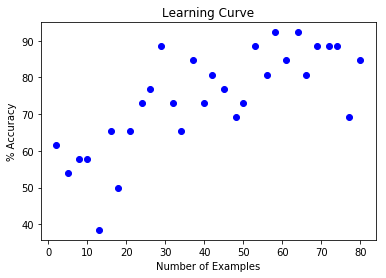

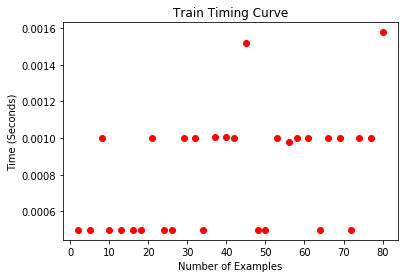

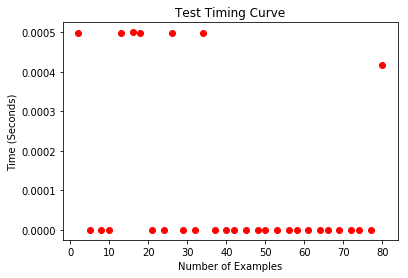

In [25]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/30) for i in range(1, 31)]
fractions = list(reversed(fractions))

besthyperParameter = None

outputData = []

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupDataSVM(finalData, i)
    testValues = trainandTestSVM(data, 'linear', besthyperParameter, 'SVMLinearHP.csv')
    besthyperParameter = testValues[3]
    X_data = data[0]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'SVMLinearOutput.csv')

current iteration fraction: 0.900000
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 6 0.6000000000000001 0.0012000000000000001 83.33333333333334
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 4 0.9 0.0016 88.88888888888889
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 7 0.1 0.0024000000000000002 77.77777777777779
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 5 0.30000000000000004 0.0004 88.88888888888889
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 2 0.7000000000000001 0.0024000000000000002 83.33333333333334
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 10 0.4 0.0028 77.77777777777779
started Training
stopped training
for the hyperParameter %s, %f, %f, %f the accuracy is %f poly 10 0.70000000

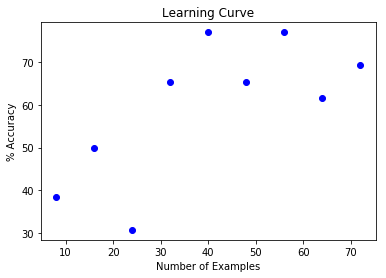

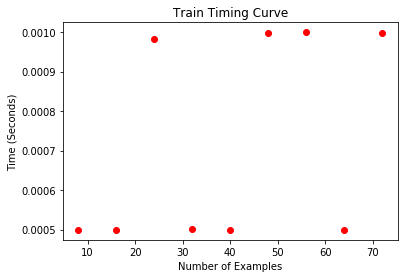

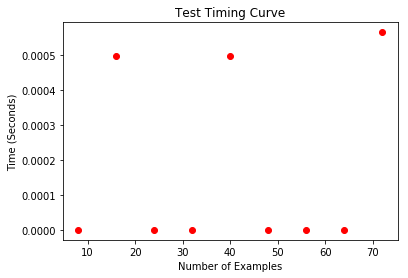

In [26]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/10) for i in range(1, 10)]
fractions = list(reversed(fractions))

besthyperParameter = None

outputData = []

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupDataSVM(finalData, i)
    testValues = trainandTestSVM(data, 'poly', besthyperParameter, 'SVMPolyHP.csv')
    besthyperParameter = testValues[3]
    X_data = data[0]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'SVMPolyOutput.csv')

# NeuralNetwork

In [27]:
def setupDataNN(finalData, fraction):
    
    data, test = train_test_split(finalData, test_size = 0.2)
    data = data.sample(frac = fraction)
    
    train, validate = train_test_split(data, test_size = 0.2)
    
    
    features = ['Parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']

    X_train = train[features]
    y_train = train['app_status']
    
    X_validate = validate[features]
    y_validate = validate['app_status']

    X_test = test[features]
    y_test = test["app_status"]
    return (X_train, y_train, X_validate, y_validate, X_test, y_test)

In [28]:
def setupModel():
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras import optimizers
    import random
    
    model = Sequential()
    model.add(Dense(50, input_dim = 8, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'sigmoid'))
    model.summary()
    return model

In [29]:
def writeDictToCSV(dictionary, fileName):
    df = pd.DataFrame(list(dictionary.items()), columns = ['epochs', 'Accuracy'])
    df.to_csv(fileName)

In [31]:
def trainandTestNeuralNetwork(data, bestHyperParameter):
   
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras import optimizers
    import random


    X_train, y_train, X_validate, y_validate, X_test, y_test = data


    hyperParametersLR = [.0001, .003, .05, .8]
    hyperParametersM = [.2, .5, .8]
    hyperParameters = list(itertools.product(hyperParametersLR, hyperParametersM))

    accuracies = {}


    #one-hot encoding
    y_train = keras.utils.to_categorical(y_train, num_classes = 3)
    y_validate = keras.utils.to_categorical(y_validate, num_classes = 3)
    y_test = keras.utils.to_categorical(y_test, num_classes = 3)
    
    
    
    firstTime = False
    if bestHyperParameter is None:
        firstTime = True
    
    
    
    if bestHyperParameter is None:
        for hyperParameter in hyperParameters:
            model = setupModel()
            sgd = optimizers.SGD(lr = hyperParameter[0], decay = 1e-6, momentum = hyperParameter[1], nesterov=True)
            model.compile(loss = 'mean_squared_error', optimizer = sgd, metrics=["mean_squared_error", 'accuracy'])

            model.fit(X_train, y_train, epochs = 8, batch_size = 128)

            score1, score2, acc = model.evaluate(X_validate, y_validate, batch_size = 128)
            


            print("for the hyperParameter %d, the accuracy is %f" , hyperParameter, score1, score2, acc)
            accuracies[hyperParameter] = acc

        print("finished \n")
        bestHyperParameter = max(accuracies, key=accuracies.get)
        print("best hyper parameter: %d" , bestHyperParameter[0], bestHyperParameter[1])
        storeHyperParameters(accuracies, 'NeuralNetHP.csv')

    model = setupModel()    
    sgd = optimizers.SGD(lr = bestHyperParameter[0], decay = 1e-6, momentum = bestHyperParameter[1], nesterov=True)
    model.compile(loss = 'mean_squared_error', optimizer = sgd, metrics=["mean_squared_error", 'accuracy'])
    
    start = time.time()
    if firstTime:
        learningCurveIterations = {}
        counter = 0;
        for i in range (1, 2):
            model.fit(X_train, y_train, epochs = 40, batch_size = 128)
            counter += 40
            end = time.time()
            score1, score2, acc = model.evaluate(X_test, y_test, batch_size = 128)
            scoreTrain1, scoreTrain2, accTrain = model.evaluate(X_train, y_train, batch_size = 128)
            learningCurveIterations[counter] = (acc, accTrain)
        writeDictToCSV(learningCurveIterations, 'nnlearningIterations.csv')
    else:
        model.fit(X_train, y_train, epochs = 20, batch_size = 128)
        end = time.time()
    trainTime = end - start
        
    start = time.time()
    performance1, performance2, score = model.evaluate(X_test, y_test, batch_size = 128)
    end = time.time()
    testTime = end - start
    
    performance1, performance2, trainAcc = model.evaluate(X_train, y_train, batch_size = 128)

    
    print("The Score is %f" % (score))
    
    return (score, trainTime, testTime, bestHyperParameter, trainAcc)

current iteration fraction: 0.900000


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 3,153
Trainable params: 3,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
72/72 [==============================] - 0s 5ms/step - loss: 0.3447 - mean_squared_error: 0.3447 - acc: 0.3056
Epoch 2/8
72/72 [==

Epoch 8/8
18/18 [==============================] - 0s 6ms/step
for the hyperParameter %d, the accuracy is %f (0.003, 0.2) 0.25785645842552185 0.25785645842552185 0.2222222238779068
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 153       
Total params: 3,153
Trainable params: 3,153
Non-trainable params: 0
_________________________

Epoch 6/8
72/72 [==============================] - 0s 49us/step - loss: 0.2558 - mean_squared_error: 0.2558 - acc: 0.4028
Epoch 7/8
72/72 [==============================] - 0s 42us/step - loss: 0.2479 - mean_squared_error: 0.2479 - acc: 0.3472
Epoch 8/8
18/18 [==============================] - 0s 10ms/step
for the hyperParameter %d, the accuracy is %f (0.05, 0.5) 0.213784858584404 0.213784858584404 0.4444444477558136
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)            

Epoch 4/8
72/72 [==============================] - 0s 42us/step - loss: 0.1998 - mean_squared_error: 0.1998 - acc: 0.6111
Epoch 5/8
72/72 [==============================] - 0s 35us/step - loss: 0.1916 - mean_squared_error: 0.1916 - acc: 0.5556
Epoch 6/8
72/72 [==============================] - 0s 49us/step - loss: 0.1995 - mean_squared_error: 0.1995 - acc: 0.5972
Epoch 7/8
72/72 [==============================] - 0s 42us/step - loss: 0.1925 - mean_squared_error: 0.1925 - acc: 0.5556
Epoch 8/8
18/18 [==============================] - 0s 10ms/step
for the hyperParameter %d, the accuracy is %f (0.8, 0.8) 0.18502095341682434 0.18502095341682434 0.5555555820465088
finished 

best hyper parameter: %d 0.8 0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_25 (Dropout)    

Epoch 3/20
64/64 [==============================] - 0s 55us/step - loss: 0.2270 - mean_squared_error: 0.2270 - acc: 0.3750
Epoch 4/20
64/64 [==============================] - 0s 39us/step - loss: 0.2357 - mean_squared_error: 0.2357 - acc: 0.4375
Epoch 5/20
64/64 [==============================] - 0s 47us/step - loss: 0.2225 - mean_squared_error: 0.2225 - acc: 0.3750
Epoch 6/20
64/64 [==============================] - 0s 47us/step - loss: 0.2347 - mean_squared_error: 0.2347 - acc: 0.3906
Epoch 7/20
64/64 [==============================] - 0s 47us/step - loss: 0.2195 - mean_squared_error: 0.2195 - acc: 0.4062
Epoch 8/20
64/64 [==============================] - 0s 47us/step - loss: 0.2196 - mean_squared_error: 0.2196 - acc: 0.4375
Epoch 9/20
64/64 [==============================] - 0s 47us/step - loss: 0.2110 - mean_squared_error: 0.2110 - acc: 0.4531
Epoch 10/20
64/64 [==============================] - 0s 55us/step - loss: 0.2069 - mean_squared_error: 0.2069 - acc: 0.4844
Epoch 11/20
64/

Epoch 11/20
48/48 [==============================] - 0s 52us/step - loss: 0.2143 - mean_squared_error: 0.2143 - acc: 0.4583
Epoch 12/20
48/48 [==============================] - 0s 62us/step - loss: 0.1913 - mean_squared_error: 0.1913 - acc: 0.5625
Epoch 13/20
48/48 [==============================] - 0s 83us/step - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.5000
Epoch 14/20
48/48 [==============================] - 0s 114us/step - loss: 0.2057 - mean_squared_error: 0.2057 - acc: 0.4792
Epoch 15/20
48/48 [==============================] - 0s 62us/step - loss: 0.1893 - mean_squared_error: 0.1893 - acc: 0.6250
Epoch 16/20
48/48 [==============================] - 0s 52us/step - loss: 0.1912 - mean_squared_error: 0.1912 - acc: 0.6250
Epoch 17/20
48/48 [==============================] - 0s 52us/step - loss: 0.1984 - mean_squared_error: 0.1984 - acc: 0.5625
Epoch 18/20
48/48 [==============================] - 0s 62us/step - loss: 0.1946 - mean_squared_error: 0.1946 - acc: 0.5417
Epoch 1

Epoch 19/20
32/32 [==============================] - 0s 94us/step - loss: 0.1819 - mean_squared_error: 0.1819 - acc: 0.6562
Epoch 20/20
32/32 [==============================] - 0s 47us/step
The Score is 0.615385
current iteration fraction: 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_37 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_38 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 153       
Total params: 3,153
Train

Epoch 1/20
8/8 [==============================] - 1s 88ms/step - loss: 0.2851 - mean_squared_error: 0.2851 - acc: 0.3750
Epoch 2/20
8/8 [==============================] - 0s 247us/step - loss: 0.2046 - mean_squared_error: 0.2046 - acc: 0.2500
Epoch 3/20
8/8 [==============================] - 0s 437us/step - loss: 0.2488 - mean_squared_error: 0.2488 - acc: 0.3750
Epoch 4/20
8/8 [==============================] - 0s 312us/step - loss: 0.2941 - mean_squared_error: 0.2941 - acc: 0.2500
Epoch 5/20
8/8 [==============================] - 0s 312us/step - loss: 0.2128 - mean_squared_error: 0.2128 - acc: 0.3750
Epoch 6/20
8/8 [==============================] - 0s 499us/step - loss: 0.1609 - mean_squared_error: 0.1609 - acc: 0.7500
Epoch 7/20
8/8 [==============================] - 0s 686us/step - loss: 0.2394 - mean_squared_error: 0.2394 - acc: 0.6250
Epoch 8/20
8/8 [==============================] - 0s 375us/step - loss: 0.2331 - mean_squared_error: 0.2331 - acc: 0.5000
Epoch 9/20
8/8 [=========

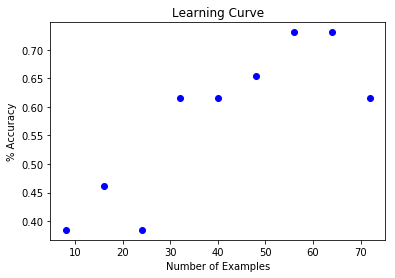

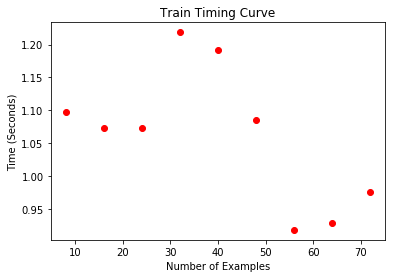

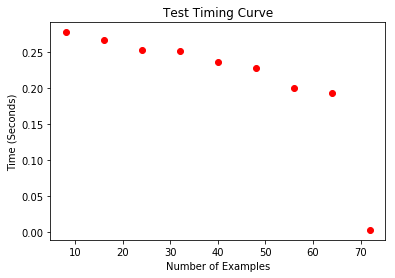

In [32]:
finalData = importData('finalDataNursing.csv')

#loop through different data sizes and get curve
fractions = [i*(1.0/10) for i in range(1, 10)]
fractions = list(reversed(fractions))

bestHyperParameter = None

outputData = []

for i in fractions:
    print("current iteration fraction: %f" % (i))
    data = setupDataNN(finalData, i)
    testValues = trainandTestNeuralNetwork(data, bestHyperParameter)
    bestHyperParameter = testValues[3]
    X_data = data[0]
    outputData.append((X_data.shape[0], testValues[0], testValues[1], testValues[2], testValues[4]))
    
makePlots(outputData, 'NeuralNet.csv')